# Investigating the cause metrics for tsdr

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from collections import defaultdict, OrderedDict
import pathlib

import numpy as np
import pandas as pd
import torch
import torchinfo
import scipy.stats
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.size"] = 7
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.grid'] = True

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', FutureWarning)

import sys
sys.path.append("../")

from notebooklib.save import run_tsdr, save_tsdr, load_tsdr, validate_datasets, plot_figures_of_cause_metrics

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [4]:
DATASET_ID = "9n6mf"
datasets_hdbscan_sbd = load_tsdr(DATASET_ID, suffix="fluxrank_max_cluster", revert_normalized_time_series=True)

In [5]:
with pd.option_context("display.max_rows", None):
    check_results_df, dataset_by_chaos_case = validate_datasets(datasets_hdbscan_sbd)
    display(check_results_df)

anomalous_ok  \
target_app chaos_type          chaos_comp   chaos_case_num                 
sock-shop  pod-cpu-hog         carts        0                       True   
                                            1                       True   
                                            2                       True   
                                            3                       True   
                                            4                       True   
                               carts-db     0                       True   
                                            1                       True   
                                            2                       True   
                                            3                       True   
                                            4                       True   
                               catalogue    0                       True   
                                            1                       True   
                                            2                       True   
                                            3                       True   
                                            4                       True   
                               catalogue-db 0                       True   
                                            1                       True   
                                            2                       True   
                                            3                       True   
                                            4                       True   
                               orders       0                       True   
                                            1                       True   
                                            2                       True   
                                            3                       True   
                                            4                       True   
                               orders-db    0                       True   
                                            1                       True   
                                            2                       True   
                                            3                       True   
                                            4                       True   
                               payment      0                       True   
                                            1                       True   
                                            2                       True   
                                            3                       True   
                                            4                       True   
                               user         0                       True   
                                            1                       True   
                                            2                       True   
                                            3                       True   
                                            4                       True   
                               user-db      0                       True   
                                            1                       True   
                                            2                       True   
                                            3                       True   
                                            4                       True   
           pod-memory-hog      carts        0                       True   
                                            1                       True   
                                            2                       True   
                                            3                       True   
                                            4                       True   
                               carts-db     0                       True   
                                

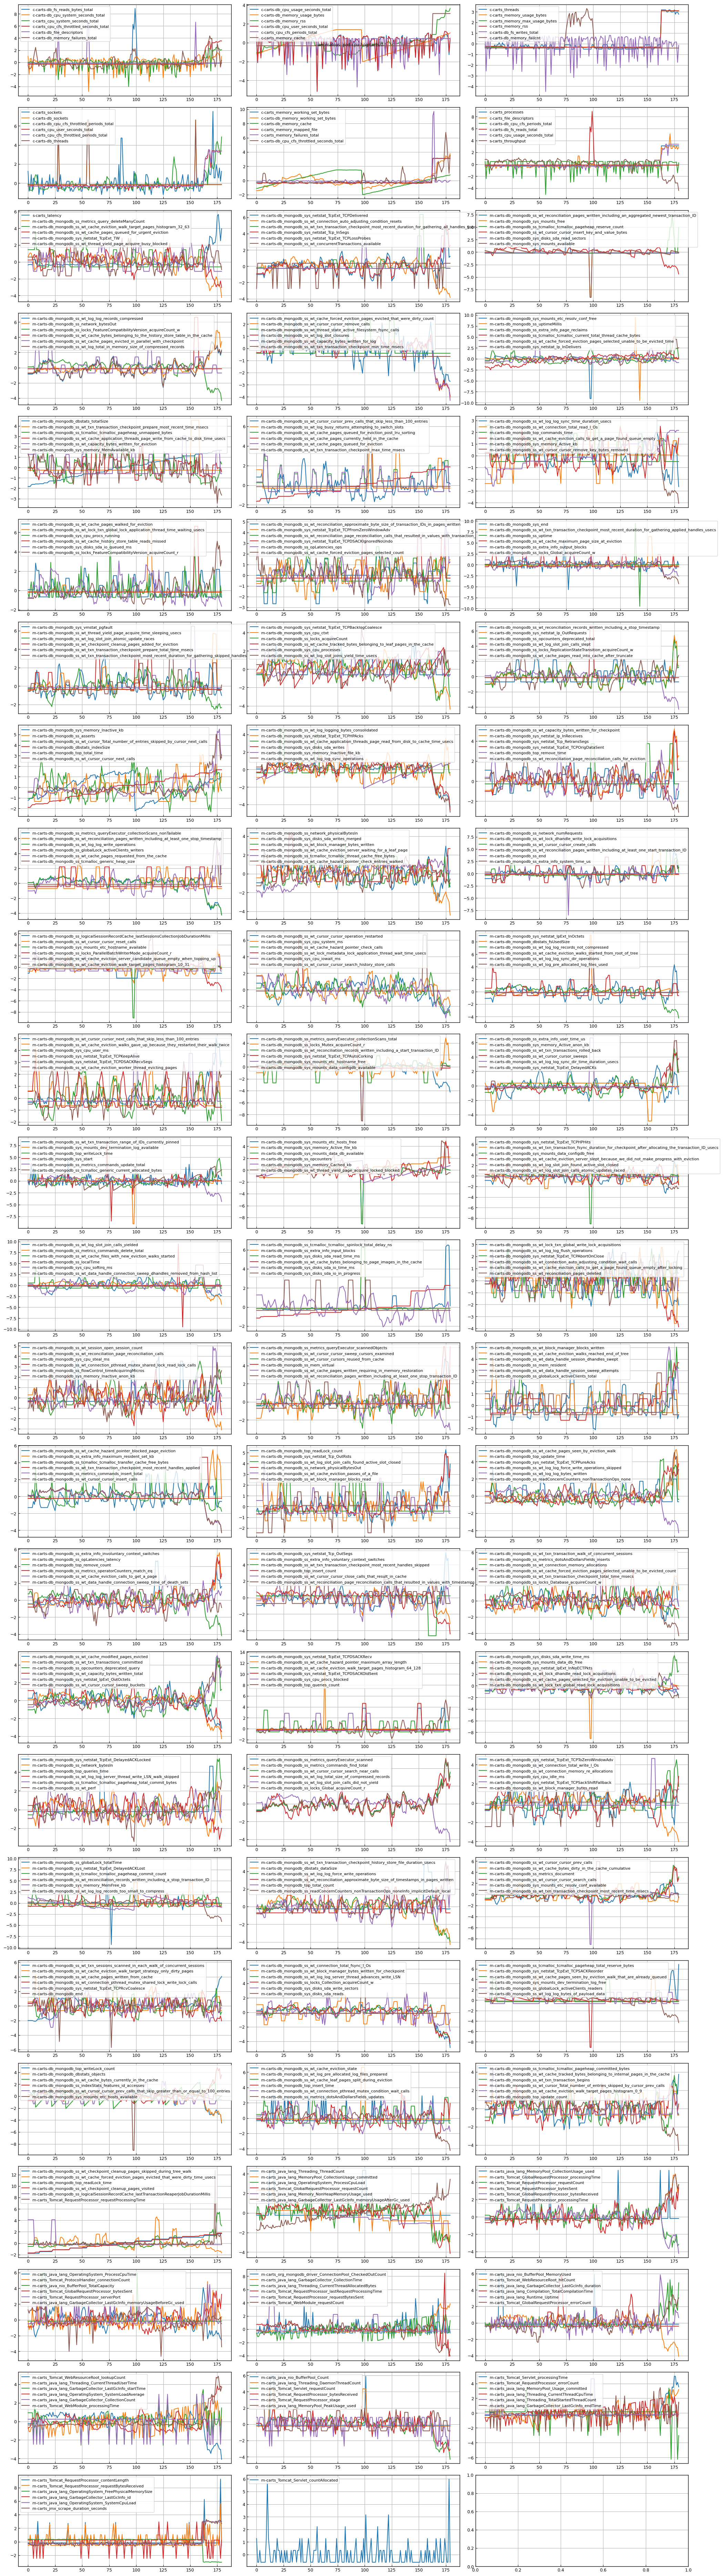

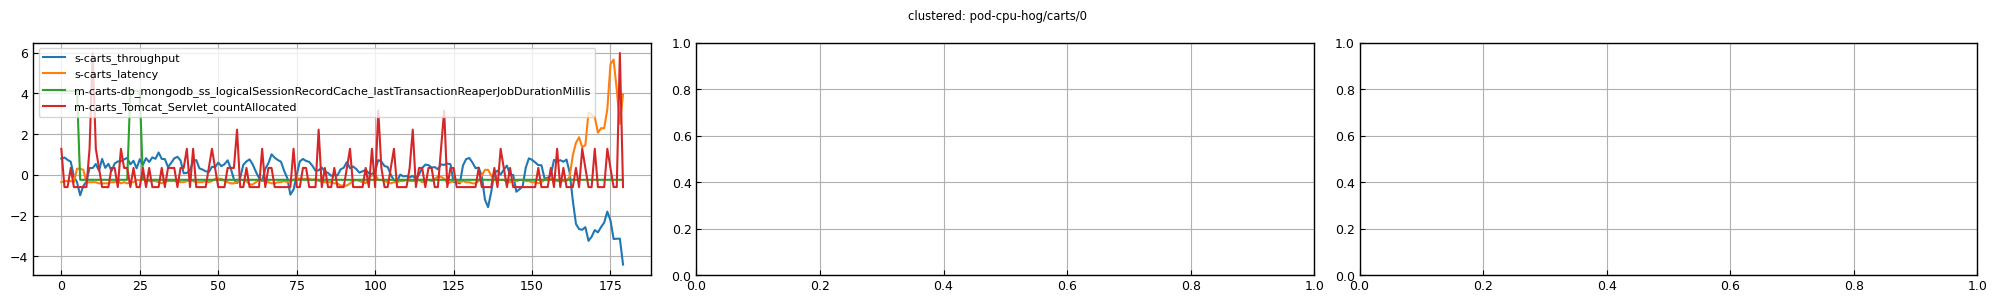

In [6]:
plot_figures_of_cause_metrics(check_results_df, dataset_by_chaos_case, only_clustered_ng=True)